## Keshava Tonathiu Sanchez Barbosa
#### 418127029 | keshava.t.s.b@gmail.com

## Tarea 2: extracción de kernel, filtros de contraste, media, mediana, maximo y minimo

#### ¿Cuál es el valor maximo y minimo de gris en las imagenes?

##### El valor maximo es 255, y el valor minimo es 0

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import copy

In [2]:
def LoadImage(img_label):
    img  = cv2.imread(img_label,0) 
    img  = np.array(img, dtype = np.float)
    return img

def contrast(img):
    maximo = img.max()
    minimo = img.min()
    
    norm = copy.copy(img)
    
    for i in range(len(img)):
        for j in range(len(img[0])):
            norm[i][j] = 255*((img[i][j] - minimo)/(maximo-minimo)) 
    
    return norm

# Extraer Kernel

##### El objetivo es extraer una matriz de tamaño nxn (que debe ser impar en el caso de esta tarea) de una imagen.
##### La información que se proporciona para realizar esta tarea es: la imagen original, el pixel central de la imagen nxn y el tamaño de la matriz nxn que debera de ser impar siempre.
##### El output esperado: una matriz nxn que contiene los pixeles de la imagen

# Como funciona mi implementación

##### Primero se verifica que el tamaño de la matriz solicitada sea impar.
##### Ademas existe una segunda verificación de que las operaciones de movimiento de la matriz no superaran el tamaño de esta misma, si se cumplen ambas se inicia con el procedimiento
##### Si es impar se reacomoda la recta en la que se encuentra cada linea de la matriz, esto lo hacemos para poder encontrar toda la matriz objetivo al rededor del pixel central.
##### ¿Como se hace? al ser impar la matriz, si representamos una fila de la matriz en una recta, tendremos una hilera donde el numero en el centro tiene la misma cantidad de numeros tanto a la derecha como a la izquierda, asi que si a esta recta le restamos un elemento (el elemento del centro) y lo dividimos entre dos obtendremos cuantos elementos hay hacia la izquierda y cuantos elementos hay a la derecha de nuestro punto de referencia (ajuste = (n - 1)/2).
##### Teniendo esta información podemos entonces colocar nuestro punto origen (0,0) de la siguente manera:
##### Primero, como estamos considerando nuestro centro como el 0 en la recta, nuestro ajuste osea el punto donde debe iniciar se tiene que volver negativo, para que se considere estando al inicio de dicha recta (inicio = -1 * (ajuste))
##### asi que pondremos nuestro origen = ((centro[0] + ajuste), (centro[1] + ajuste)
##### se crea una variable kernel = [] que sera un arreglo vacio donde se ira almacenando nuestra submatriz de la imagen
##### guardaremos una variable auxiliar extra para nuestro ciclo anidado, inicio2 = inicio, y ademas tendremos una segunda variable auxiliar para almacenar cada renglon de la submatriz, lineaKernel = []
##### se tiene un doble ciclo anidado donde se recorrera toda la submatriz de tamaño nxn al rededor del pixel centro, se almacenara cada elemento encontrado mientras nuestra variable de inicio1 sea menor o igual que el ajuste
##### al final se regresa el kernel encontrado

In [3]:
def extractkernel(img, center, kernel_size):
    if kernel_size % 2 == 0: #verificar si es impar
        return -1
    
    start = int((kernel_size - 1)/2) #se obtiene el punto de inicio a partir de la referencia del centro
    
    if center[0] - start < 0 or center[1] - start < 0 or center[0] + start > len(img)-1 or center[1] + start > len(img[0])-1: #se verifica que no se salga del limite de la matriz
        return -1
    
    kernel = [] #para almacenar el kernel
    
    i = start*(-1)
    while i <= start:
        j = start*(-1)
        
        kernel_line = [] #para almacenar cada linea del kernel
        
        while j <= start:
            kernel_line.append(img[center[0] + i][center[1] + j]) #se agrega cada elemento encontrado a la linea del kernel
            j += 1
            
        kernel.append(kernel_line) #se agrega cada linea del kernel a la variable que contendra la submatriz
        i += 1
        
    return kernel #se regresa el kernel obtenido

# Filtro de media(promedio)

##### Este filtro usa como base la función para extraer kernel
##### La forma en que funciona es la siguiente:
##### Se toma una imagen, a cada pixel de la imagen se toma como el centro de una submatriz nxn, se obtiene el promedio de todos los valores que se encuenetran en la submatriz, y el valor resultante se le asigna al centro de la submatriz en una copia de la imagen original

In [4]:
def filtroMedia(img, kernel_size):
    img_filtrada_media = copy.copy(img) #se crea una copia de la imagen orignal para poder alterarla sin arriesgar la integridad de las operaciones
    
    for i in range(len(img)):
        for j in range(len(img[0])):
            center = [i, j] #se considera a cada pixel como el centro de una subtamriz de tamaño kernel_size x kernel_size
            kernel = extractkernel(img, center, kernel_size) #se extrae la submatriz 
            
            if kernel != -1: #si la función nos provee con un kernel, es decir era posible extraerlo
                mean = np.mean(kernel) #obtenemos el promedio de todos los valores contenidos en dicho kernel
                img_filtrada_media[i][j] = mean #en la copia de la imagen se realiza la asignación del nuevo valor
    
    return img_filtrada_media #se regresa la nueva imagen generada

# Filtro de mediana

##### Este filtro usa como base la función para extraer kernel

##### La forma en que funciona es la siguiente:

##### Se toma una imagen, a cada pixel de la imagen se le considera el centro de una submatriz nxn, se extrae dicha submatriz y se organizan todos sus valores de menor a mayor en un unico vector, el valor del centro (la mediana) se convierte en el nuevo valor central de la submatriz

In [5]:
def filtroMediana(img, kernel_size):
    img_filtrada_mediana = copy.copy(img) #se crea una copia de la imagen para que se pueda realizar los cambios sin arriesgar la integridad  de las operacioens
    
    for i in range(len(img)):
        for j in range(len(img[0])):
            center = [i, j] #cada pixel se considera como el centro de un kernel
            kernel = extractkernel(img, center, kernel_size) #se extrae el kernel
            
            if kernel != -1:
                values = sum(kernel, []) #sirve para convertir una matriz en un unico vector
                values.sort() #se ordena de menor a mayor
                mediana_pos = int(((len(values) - 1) / 2) + 1) #a partir de la misma propiedad que usamos para reajustar la escala en el kernel, pero sumandole uno se obtiene el centro del vector
                img_filtrada_mediana[i][j] = values[mediana_pos] #se reasigna el valor del pixel en la copia de la imagen al valor de la mediana
                
    return img_filtrada_mediana #se regresa la nueva imagen

# Filtro de valor maximo

##### Este filtro usa como base la función para extraer kernel

##### La forma en que funciona es la siguiente:

##### Se toma una imagen, a cada pixel de la imagen se le considera el centro de una submatriz nxn, se extrae dicha submatriz y se busca el valor maximo en dicha submatriz, este se convertira en el nuevo valor del pixel central de la submatriz

In [42]:
def filtroMaximo(img, kernel_size):
    img_filtrada_maximo = copy.copy(img) #se crea una copia de la imagen para que se pueda realizar los cambios sin arriesgar la integridad  de las operacioens
    
    for i in range(len(img)):
        for j in range(len(img[0])):
            center = [i, j] #cada pixel de la imagen se considera como el centro de un kernel
            kernel = extractkernel(img, center, kernel_size) #se extrae el kernel
            
            if kernel != -1:
                maximo = np.max(kernel) #buscamos el valor maximo dentro de la submatriz
                img_filtrada_maximo[i][j] = maximo  #asignamos el valor maximo al pixel en la copia de la imagen
                
    return img_filtrada_maximo #regresamos la nueva imagen

# Filtro de minimo

##### Este filtro usa como base la función para extraer kernel

##### La forma en que funciona es la siguiente:

##### Se toma una imagen, a cada pixel de la imagen se le considera el centro de una submatriz nxn, se extrae dicha submatriz y se busca el valor minimo en dicha submatriz, este se convertira en el nuevo valor del pixel central de la submatriz

In [7]:
def filtroMinimo(img, kernel_size):
    img_filtrada_minimo = copy.copy(img) #se crea una copia de la imagen para que se pueda realizar los cambios sin arriesgar la integridad  de las operacioens
    
    for i in range(len(img)):
        for j in range(len(img[0])):
            center = [i, j] #cada pixel de la imagen se considera como el centro de un kernel
            kernel = extractkernel(img, center, kernel_size) #se extrae el kernel
            
            if kernel != -1:
                minimo = np.min(kernel) #se busca el minimo en el kernel
                img_filtrada_minimo[i][j] = minimo #se asigna el valor minimo al pixel en la copia de la imagen
                
    return img_filtrada_minimo #se regresa la imagen nueva

In [8]:
fig6 = LoadImage("figura6.jpeg")

In [9]:
fig6

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
img_kernel = extractkernel(fig6, [100, 101], 5)

In [14]:
img_kernel

[[4.0, 4.0, 5.0, 5.0, 6.0],
 [4.0, 3.0, 3.0, 4.0, 5.0],
 [3.0, 2.0, 2.0, 3.0, 4.0],
 [2.0, 1.0, 2.0, 3.0, 4.0],
 [4.0, 2.0, 2.0, 3.0, 5.0]]

In [10]:
img_contrast_filter = contrast(fig6)

(<matplotlib.image.AxesImage at 0x21937594e88>, Text(0.5, 1.0, 'original'))

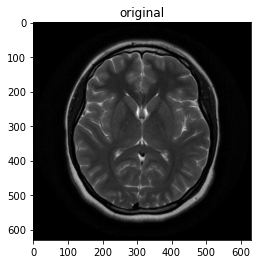

In [11]:
plt.imshow(fig6, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x21937abfa88>, Text(0.5, 1.0, 'contraste'))

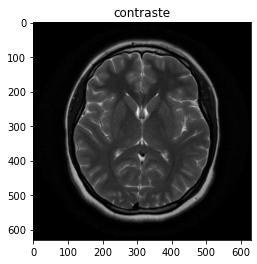

In [12]:
plt.imshow(img_contrast_filter, 'gray'),plt.title('contraste')

(<matplotlib.image.AxesImage at 0x21938178988>, Text(0.5, 1.0, 'media'))

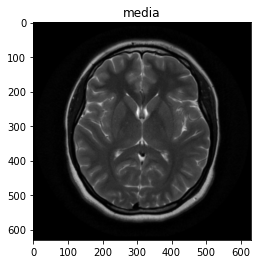

In [15]:
img_mean_filter = filtroMedia(fig6, 3)
plt.imshow(img_mean_filter, 'gray'),plt.title('media')

(<matplotlib.image.AxesImage at 0x2193a135688>, Text(0.5, 1.0, 'mediana'))

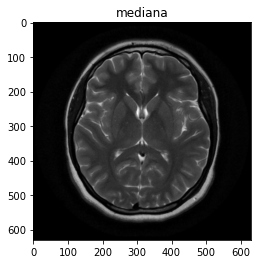

In [18]:
img_mediana_filter = filtroMediana(fig6, 3)
plt.imshow(img_mediana_filter, 'gray'),plt.title('mediana')

(<matplotlib.image.AxesImage at 0x2193a1d0848>, Text(0.5, 1.0, 'maximo'))

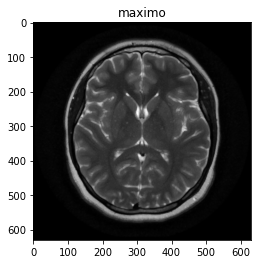

In [19]:
img_max_filter = filtroMaximo(fig6, 3)
plt.imshow(img_max_filter, 'gray'),plt.title('maximo')

(<matplotlib.image.AxesImage at 0x2193ada1188>, Text(0.5, 1.0, 'minimo'))

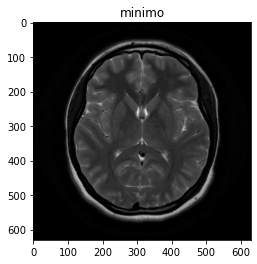

In [20]:
img_min_filter = filtroMinimo(fig6, 3)
plt.imshow(img_min_filter, 'gray'),plt.title('minimo')

In [23]:
fig7 = LoadImage("figura7.jpg")

(<matplotlib.image.AxesImage at 0x2193a326a08>, Text(0.5, 1.0, 'original'))

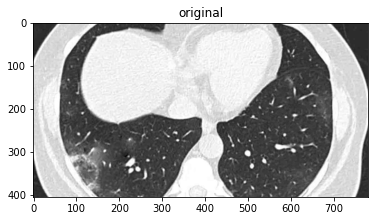

In [24]:
plt.imshow(fig7, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x2193a4af788>, Text(0.5, 1.0, 'contraste'))

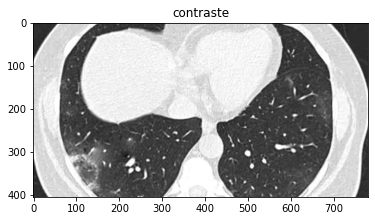

In [26]:
img_contrast_filter = contrast(fig7)
plt.imshow(img_contrast_filter, 'gray'),plt.title('contraste')

(<matplotlib.image.AxesImage at 0x2193a6e9588>, Text(0.5, 1.0, 'media'))

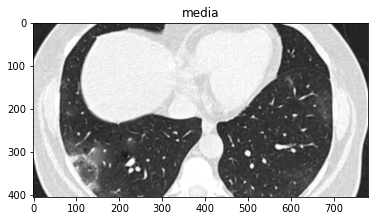

In [29]:
img_mean_filter = filtroMedia(fig7, 3)
plt.imshow(img_mean_filter, 'gray'),plt.title('media')

(<matplotlib.image.AxesImage at 0x2193a7aee08>, Text(0.5, 1.0, 'mediana'))

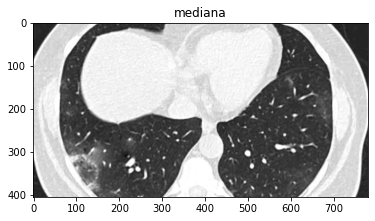

In [30]:
img_mediana_filter = filtroMediana(fig7, 3)
plt.imshow(img_mediana_filter, 'gray'),plt.title('mediana')

(<matplotlib.image.AxesImage at 0x2193a9877c8>, Text(0.5, 1.0, 'maximo'))

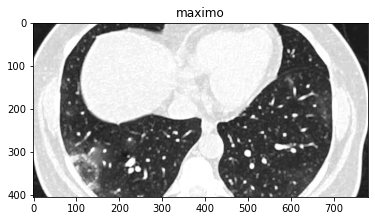

In [31]:
img_max_filter = filtroMaximo(fig7, 3)
plt.imshow(img_max_filter, 'gray'),plt.title('maximo')

(<matplotlib.image.AxesImage at 0x2193aa4d388>, Text(0.5, 1.0, 'minimo'))

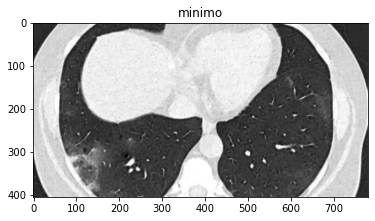

In [32]:
img_min_filter = filtroMinimo(fig7, 3)
plt.imshow(img_min_filter, 'gray'),plt.title('minimo')

In [33]:
fig8 = LoadImage("fihura8.jpg")

(<matplotlib.image.AxesImage at 0x2193ab12388>, Text(0.5, 1.0, 'original'))

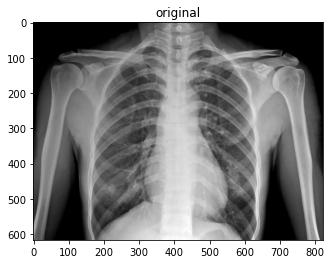

In [34]:
plt.imshow(fig8, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x2193abd67c8>, Text(0.5, 1.0, 'contraste'))

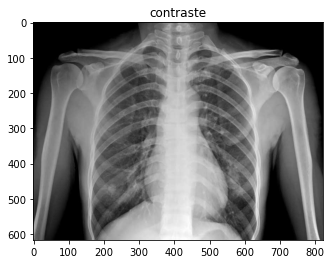

In [35]:
img_contrast_filter = contrast(fig8)
plt.imshow(img_contrast_filter, 'gray'),plt.title('contraste')

(<matplotlib.image.AxesImage at 0x2193a2d0c08>, Text(0.5, 1.0, 'media'))

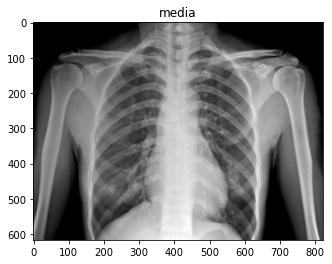

In [37]:
img_mean_filter = filtroMedia(fig8, 3)
plt.imshow(img_mean_filter, 'gray'),plt.title('media')

(<matplotlib.image.AxesImage at 0x2193a80d6c8>, Text(0.5, 1.0, 'mediana'))

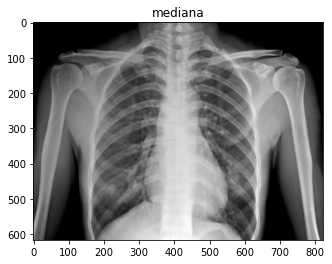

In [38]:
img_mediana_filter = filtroMediana(fig8, 3)
plt.imshow(img_mediana_filter, 'gray'),plt.title('mediana')

(<matplotlib.image.AxesImage at 0x2193b6d16c8>, Text(0.5, 1.0, 'maximo'))

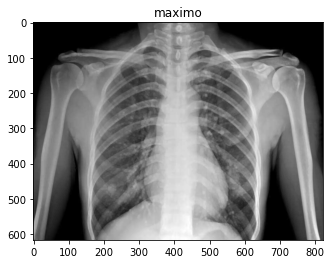

In [40]:
img_max_filter = filtroMaximo(fig8, 3)
plt.imshow(img_max_filter, 'gray'),plt.title('maximo')

(<matplotlib.image.AxesImage at 0x2193bd02508>, Text(0.5, 1.0, 'minimo'))

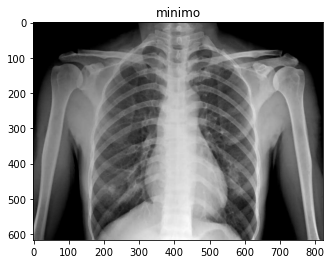

In [41]:
img_min_filter = filtroMinimo(fig8, 3)
plt.imshow(img_min_filter, 'gray'),plt.title('minimo')

# Conclusiones

### ¿Por qué los cambios no son tan notorios en la media y la mediana?

##### Para que haya cambios notorios al aplicar este tipo de filtros es necesario que haya una variación muy alta entre los niveles de grises en cada pixel, en el caso de estas imagenes, los pixeles que forman las radiografias comparten tonalidades de grises demasiado similares, por lo que notar los camibos es dificil.

##### Por otro lado los filtros de minimo y maximo es mas facil de apreciar sus cambios dado que incrementan o decrementan las tonalidades directamente, siempre al valor mas alto o mas bajo dependeido del kernel, por lo tanto inclusive cambios relativamente pequeños resultan siendo visibles.

##### Los filtros son herramientas bastante utiles para lograr resaltar distinta información de una imagen, si se tiene el conociemiento sobre que es lo que se busca es posible hacerlo resaltar sobre el resto de detalles.